# Exam 1

"Download and save the image below on your hard disk. It shows a person walking with a predominantly red umbrella, in a white dress with red designs/ribbons, and a red hair accessory. Write a program in Python to change all that red to blue. Other colors elsewhere should not be affected (red items in the background may be affected)."

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io, color, filters, feature, transform, exposure
import os

first I'll load the images, and make a copy of it to replace the red pixels (255,0,0) with blue pixels (0,0,255).

In [2]:
img = io.imread('person_red.jpg')
outImg = img.copy()

to iterate through the pixels i'll extract the rows, columns of the image and the color channels with `.shape`.

In [3]:
rows, cols, channels = img.shape

getting the color histogram to set the thresholds

(array([[  347,   877,  1769,  2709,  3314,  3614,  3774,  3778,  3644,
         3618,  3773,  3922,  4386,  4888,  5590,  5923,  6403,  7180,
         7337,  8006,  8522,  9081,  9247,  9532,  9278,  9069,  8807,
         8428,  7933,  7275,  6827,  6377,  5947,  5952,  5910,  5886,
         5735,  5546,  5522,  5192,  4798,  4537,  4429,  4209,  4073,
         3914,  3752,  3533,  3617,  3491,  3607,  3463,  3554,  3597,
         3610,  3621,  3554,  3402,  3480,  3473,  3556,  3470,  3507,
         3314,  3251,  3150,  3113,  3046,  2986,  3037,  3010,  2989,
         2895,  2745,  2735,  2589,  2543,  2436,  2322,  2276,  2231,
         2186,  2190,  2007,  2069,  1855,  1837,  1796,  1733,  1738,
         1723,  1659,  1662,  1614,  1532,  1610,  1520,  1520,  1519,
         1515,  1552,  1558,  1583,  1615,  1659,  1524,  1633,  1472,
         1459,  1412,  1468,  1398,  1478,  1453,  1305,  1297,  1369,
         1291,  1282,  1194,  1193,  1182,  1171,  1104,  1144,  1059,
     

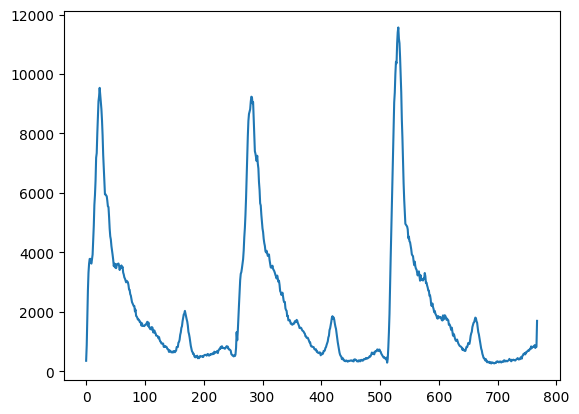

In [4]:
h = exposure.histogram(img, channel_axis=2)
hist = np.concatenate([h[0][0],h[0][1],h[0][2]])
plt.plot(hist)
print(h)

setting thresholds

In [5]:
r_min = 100
r_max = 255

g_min = 0
g_max = 100

b_min = 0
b_max = 130

now i iterae through each pixel in the image (1) and extract the RGB values of that one pixel (setting it to r, g, b) (2).

so because all the pixels are not fully red but rather a shade of red i'll create thresholds for the rgb values. to do this i looked at the intensity of each channel in the color histogram above and set the tresholds accordinagly in such way that red-dominant pixels are identified by more than some red and less than some blue(3) (i had to play around with these values and test to get it about right, also they are not the exact values I just picked them by mainly looking at the peaks in the histogram).

Finally when i know i'm on a red-dominant pixel, I'll just set its rg to 0 and b to 255 to make it blue (4).

In [6]:
for i in range(rows): # (1)
    for j in range(cols): # (1)
        r, g, b = img[i, j] # (2)
        if (r_min <= r <= r_max) and (g_min <= g <= g_max) and (b_min <= b <= b_max): # (3)
            outImg[i, j] = [0, 0, 255] # (4)

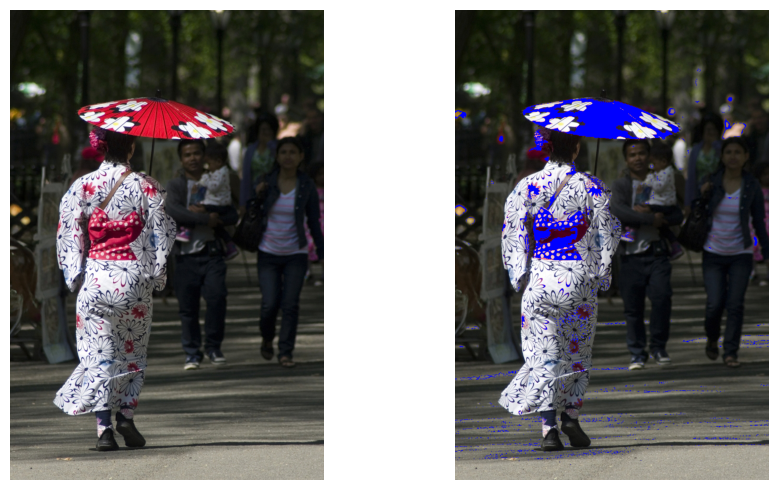

In [7]:
fig, (red, blue) = plt.subplots(1, 2, figsize=(10, 5))
red.imshow(img)
blue.imshow(outImg)
red.axis('off') 
blue.axis('off') 
plt.tight_layout()
plt.show()

the flowers at the buttom of the dress are so lightly red, so i had to increase the greens to detect and that made the floor have some blue spots. Also, the middle of the dress has a color close to black because of shadows which i cannot detect because then i have to raise the treshold of blue and green a lot. But i think this is close enough results.